# Perceptron Algorithm

## Imports, Configurations and Setup

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as matcol
import matplotlib.patches as patches
import seaborn as sb
            
# Configuration
%matplotlib inline
%config InlineBackend.figure_format='retina'
sb.set(style='ticks')

# Print options
np.set_printoptions(linewidth=160)

color_blue: #4c72b0
color_orange: #dd8452
color_green: #55a868
color_red: #c44e52
color_purple: #8172b3
color_brown: #937860
color_pink: #da8bc3
color_grey: #8c8c8c
color_yellow: #ccb974
color_aqua: #64b5cd
color_black: #000000
color_white: #ffffff


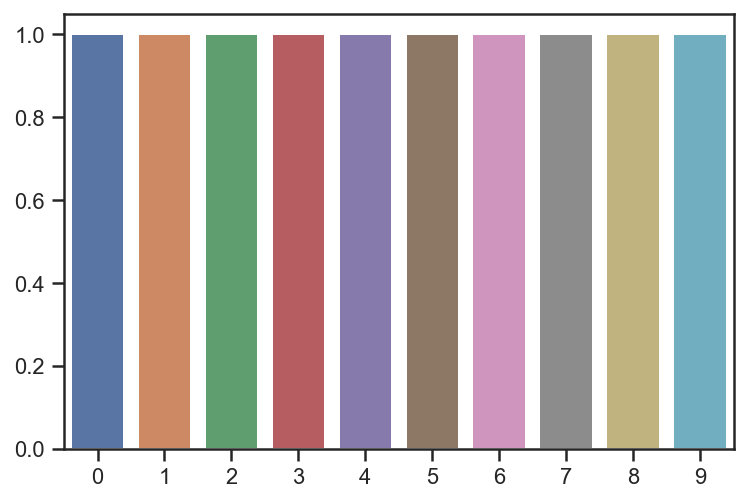

In [2]:
# Set color vars
color_blue = sb.color_palette(palette='deep')[0]
color_orange = sb.color_palette(palette='deep')[1]
color_green = sb.color_palette(palette='deep')[2]
color_red = sb.color_palette(palette='deep')[3]
color_purple = sb.color_palette(palette='deep')[4]
color_brown = sb.color_palette(palette='deep')[5]
color_pink = sb.color_palette(palette='deep')[6]
color_grey = sb.color_palette(palette='deep')[7]
color_yellow = sb.color_palette(palette='deep')[8]
color_aqua = sb.color_palette(palette='deep')[9]
color_black = (0, 0, 0)
color_white = (1, 1, 1)

print('color_blue: {}'.format(matcol.to_hex(color_blue)))
print('color_orange: {}'.format(matcol.to_hex(color_orange)))
print('color_green: {}'.format(matcol.to_hex(color_green)))
print('color_red: {}'.format(matcol.to_hex(color_red)))
print('color_purple: {}'.format(matcol.to_hex(color_purple)))
print('color_brown: {}'.format(matcol.to_hex(color_brown)))
print('color_pink: {}'.format(matcol.to_hex(color_pink)))
print('color_grey: {}'.format(matcol.to_hex(color_grey)))
print('color_yellow: {}'.format(matcol.to_hex(color_yellow)))
print('color_aqua: {}'.format(matcol.to_hex(color_aqua)))
print('color_black: {}'.format(matcol.to_hex(color_black)))
print('color_white: {}'.format(matcol.to_hex(color_white)))

sb.barplot(x=np.arange(0,10), y=[1] * 10, palette='deep');

## Overview

The perceptron algorithm is a form of supervised learning which is used for **binary classifiers**. It is heavily used in deep learning, as it forms the basis for **neural networks**. Binary classification typically concerns yes/no type of questions, like: 
- Did the student pass the exam?
- Did the patient recover? 
- Did the online shop visitor convert?

A simple example with a variable $x_1$ and a variable $x_2$ is plotted in the below graph. The **label** $y$ is depicted by the color of the dots, $\color{#4c72b0}{\textbf{blue}}$ and $\color{#c44e52}{\textbf{red}}$. What we are typically trying to achieve with binary classifier algorithms is to find the line which best divides the two classification outcomes (e.g. the $\color{#8172b3}{\textbf{purple}}$ line below).

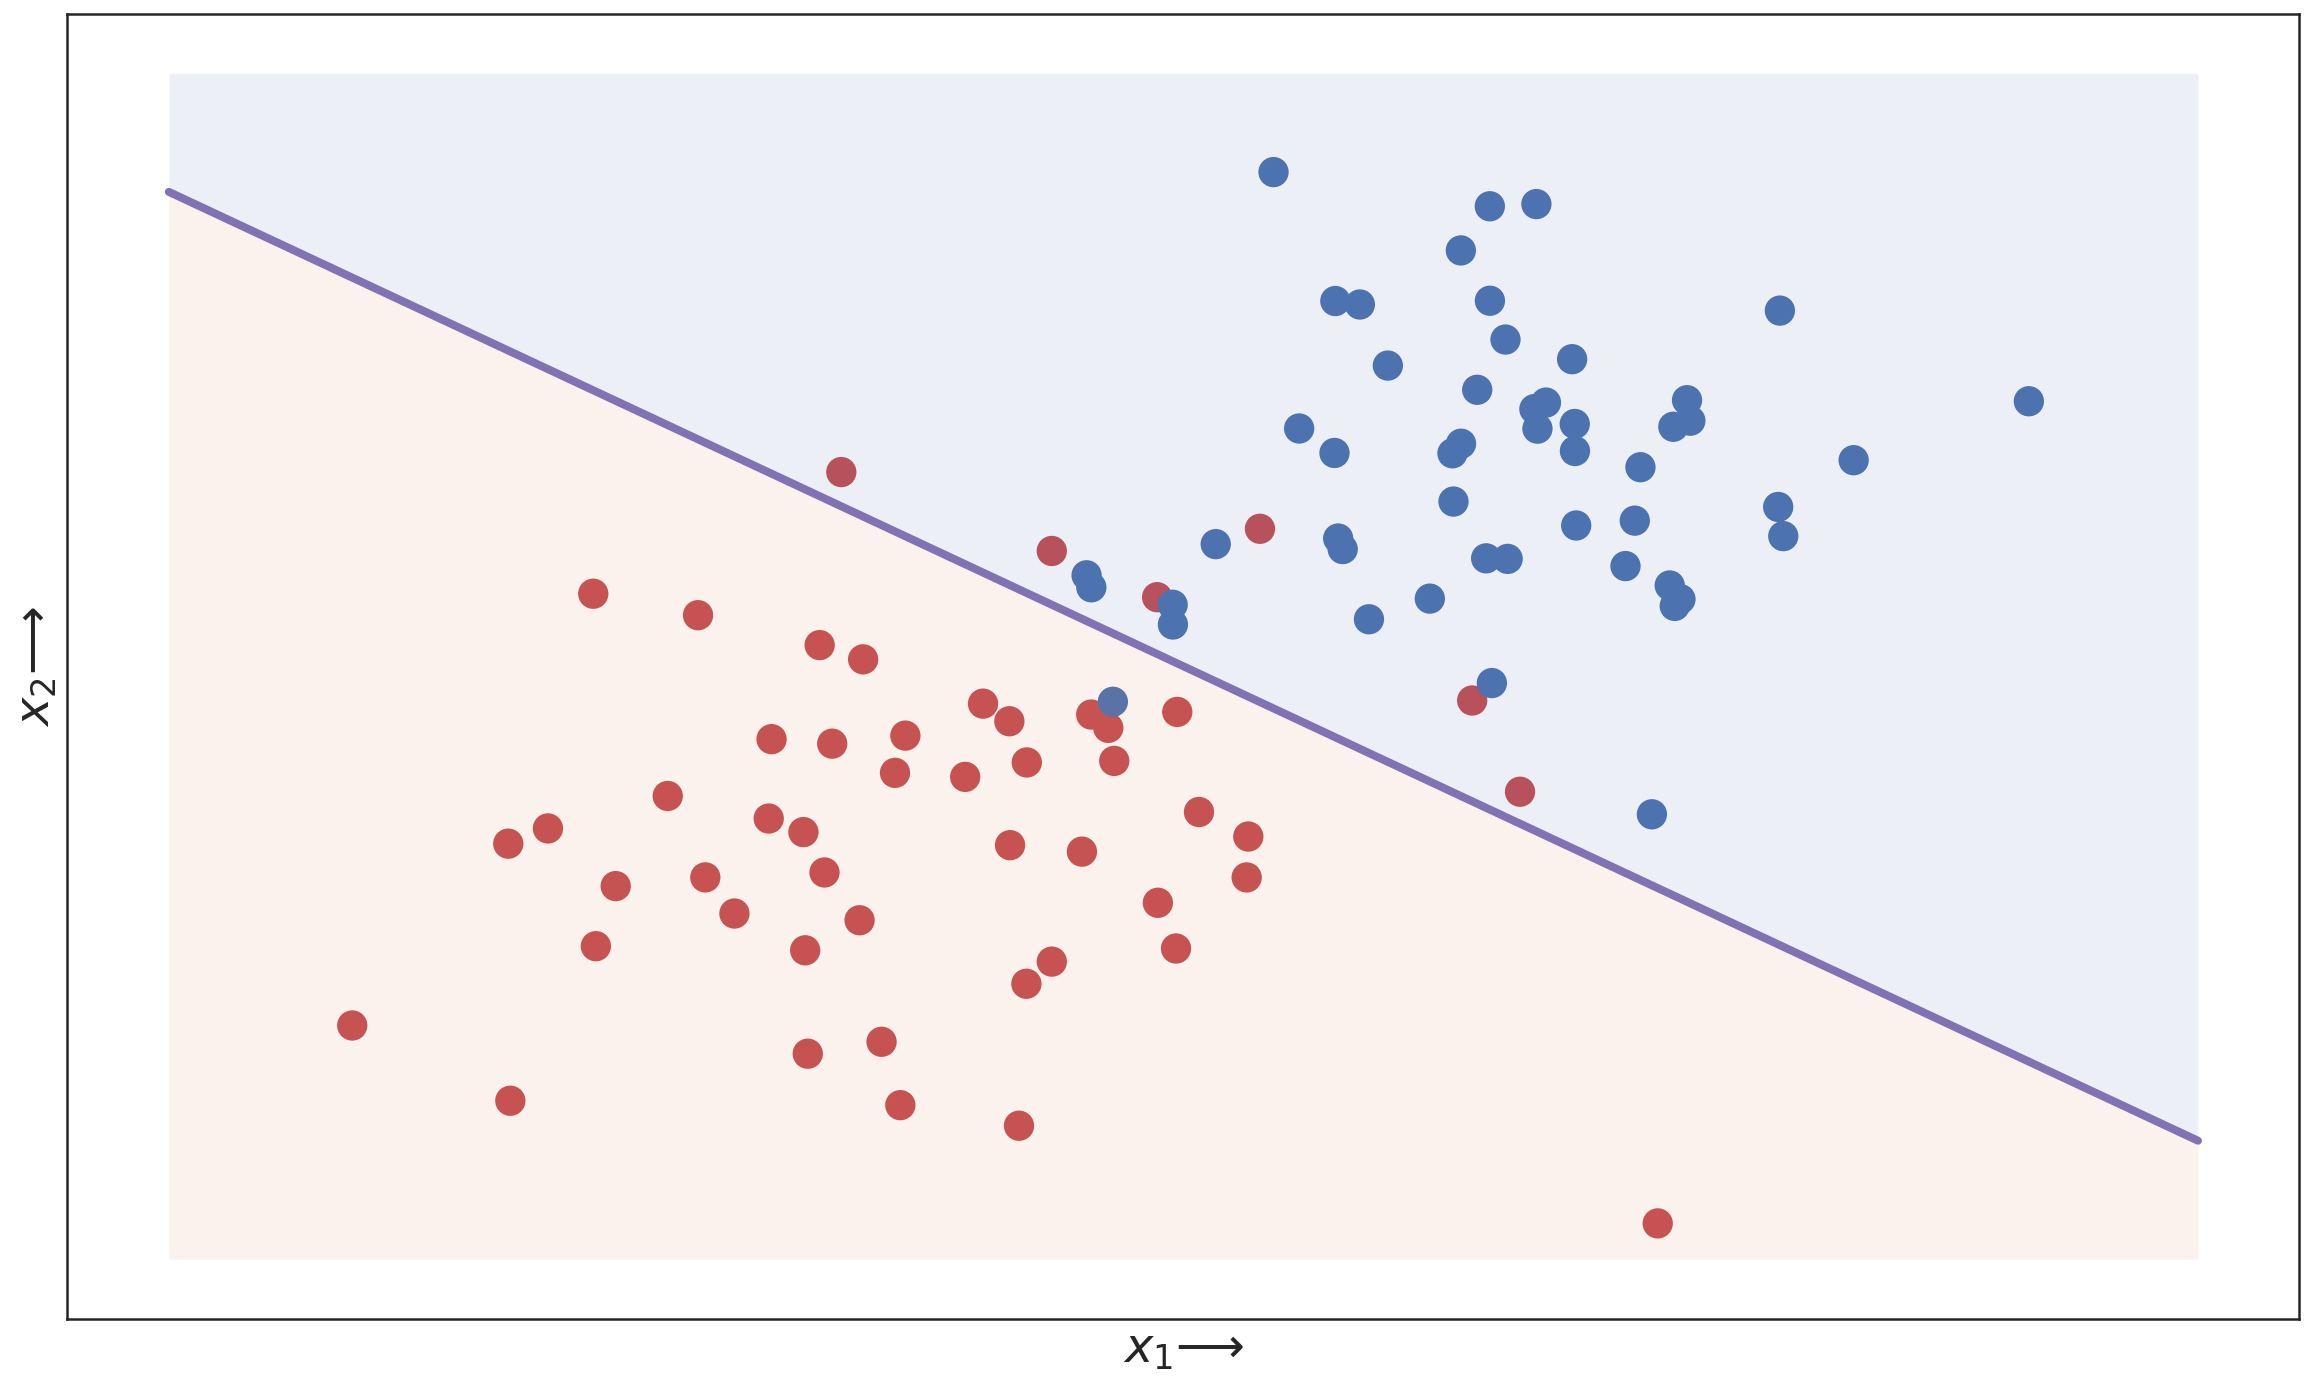

In [3]:
# Load data
df = pd.read_csv('data/perceptrons_data.csv', header=None)

# Assign columns to variables
x1 = df.iloc[:, 0]
x2 = df.iloc[:, 1]
y = df.iloc[:, 2]

# Draw plot
x_line = np.arange(-0.1, 1.11, 0.1)
plt.figure(figsize=[20, 12])
plt.scatter(x1, x2, c=y, s=200, cmap=matcol.ListedColormap([color_blue, color_red]))
plt.plot(x_line, x_line * -0.8 + 0.9, color=color_purple, linewidth=4)
plt.fill_between(x_line, x_line * -0.8 + 0.9, 1.1, alpha=0.1)
plt.fill_between(x_line, x_line * -0.8 + 0.9, -0.1, alpha=0.1)

# Set x and y labels
plt.xlabel('$x_1 ⟶$', fontsize=24)
plt.ylabel('$x_2 ⟶$', fontsize=24)

# Remove ticks
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False);

### Boundary Line

In binary classification, the line which best divides the points in a dataset considering label $y$ is called the boundary line. The goal of a binary classification algorithm is to find the optimal boundary line.

If we again take the simple example of two variables $x_1$ and $x_2$ and the label $y$ then the **boundary line** will be depicted by the formula:

$w_1x_1 + w_2x_2 + b = 0$

Or abbreviated in **vector notation**:

$Wx + b = 0 \text{, where:} \\ 
W = (w_1, w_2) \\ 
x = (x_1, x_2)$

The **label** we refer to as:

$y = \text{label: }0 \text{ or } 1$

And the **prediction** would be:

$\hat{y} = \left\{
    \begin{array}{ll}
        \color{#4c72b0}{\textbf{1}} \text{ if } Wx + b \geq 0 \\
        \color{#c44e52}{\textbf{0}} \text{ if } Wx + b < 0
    \end{array}
\right.$


#### Higher Dimensions

Extrapolating the above 2-dimensional example to higher dimensions, will make it impossible to visualize, like we did with the line example above, but it doesn't change much when it comes to the math involved. Instead of dealing with 2-dimensional space: $x_1$ and $x_2$, we would be dealing with n-dimensional space: $x_1, x_2, \ldots , x_n$

The **boundary** would be described by an $n-1$-dimensional hyperplane:

$w_1x_1 + w_2x_2 + \ldots + w_nx_n + b = 0$

This wouldn't change the **vector notation**:

$Wx + b = 0 \text{, where:} \\ 
W = (w_1, w_2, \ldots, w_n ) \\ 
x = (x_1, x_2, \ldots, x_n)$

The **label** we still refer to as:

$y = \text{label: }0 \text{ or } 1$

And the **prediction** would still be:

$\hat{y} = \left\{
    \begin{array}{ll}
        \color{#4c72b0}{\textbf{1}} \text{ if } Wx + b \geq 0 \\
        \color{#c44e52}{\textbf{0}} \text{ if } Wx + b < 0
    \end{array}
\right.$


```{note}
As $Wx + b$ needs to evaluate to a single value, the vector dimensions for this formula will be as follows: $W: (1 \times n), x: (n \times 1), b: (1 \times 1)$
```

### Single Layer Perceptron

The *Single Layer Perceptron* is the simplest form of a neural network and can be used for **linear** binary classification. It receives a number of inputs which are evaluated by a **linear function** (or *transfer function*). This function will return a numeric value which the **step function** (or *activation function*) will interpret to derive a binary label, using a predefined **threshold**.

```{note}
The bias $\color{#da8bc3}{b}$ is sometimes depicted inside the **Linear Function** node, instead of as a separate input.
```

```{image} assets/perceptron.png
:name: Perceptron
```

Here the *linear function* would be of the form:

$Wx + b \text{, where:} \\ 
W = (w_1, w_2, \ldots, w_n ) \\ 
x = (x_1, x_2, \ldots, x_n)$

The *step function* would be predicting the label using a *threshold*:

$\color{#4c72b0}{\textbf{1}} \text{ if } \geq 0 \\
\color{#c44e52}{\textbf{0}} \text{ if } < 0$


```{note}
Although Single Layer Perceptrons can only be used for **linear** classification, Multi Layer Perceptrons can also learn non-linearly separable patterns.
```

### Perceptrons as Logical Operators

An interesting fact about perceptrons is that they can also be used to model some logical operators. This can be achieved by choosing the weights of the inputs in such a way that the boundary line will split the outputs in the way expected for the respective logical operator, for each of the possible input combinations for $x_1$ and $x_2$ (having $0$ or $1$ values).

```{note}
The weights which are chosen in below sections are just one of the options which could work for the weights, to get the expected behavior for this operator. There are multiple combinations of weights possible which lead to the same result.
```

#### Logical AND Operator

The logical AND operator can be depicted as follows in the form of a perceptron:

```{image} assets/perceptron_logical_and.png
:name: Perceptron Logical AND
```

##### Configuring the Weights

```{margin}
![Perceptron - Logical AND - Truth Table](assets/perceptron_logical_and_table.png)
```

The **logical AND operator** should behave as depicted in the *Logical Truth Table* which can be achieved picking the right weights for the boundary line. If we consider the following formula, the below weights would result in he expected output:

$\text{output} = \left\{
    \begin{array}{ll}
        \color{#4c72b0}{\textbf{1}} \text{ if } w_1x_1 + w_2x_2 + b \geq 0 \\
        \color{#c44e52}{\textbf{0}} \text{ if } w_1x_1 + w_2x_2 + b < 0
    \end{array}
\right.$

$w_1 = 1, w_2 = 1, b = -2$

#### Logical OR Operator

The logical OR operator can be depicted as follows in the form of a perceptron:

```{image} assets/perceptron_logical_or.png
:name: Perceptron Logical OR
```

##### Configuring the Weights

```{margin}
![Perceptron - Logical OR - Truth Table](assets/perceptron_logical_or_table.png)
```

The **logical OR operator** should behave as depicted in the *Logical Truth Table* which can be achieved picking the right weights for the boundary line. If we consider the following formula, the below weights would result in he expected output:

$\text{output} = \left\{
    \begin{array}{ll}
        \color{#4c72b0}{\textbf{1}} \text{ if } w_1x_1 + w_2x_2 + b \geq 0 \\
        \color{#c44e52}{\textbf{0}} \text{ if } w_1x_1 + w_2x_2 + b < 0
    \end{array}
\right.$

$w_1 = 1, w_2 = 1, b = -1$

#### Logical NOT Operator

The logical NOT operator can be depicted as follows in the form of a perceptron:

```{image} assets/perceptron_logical_not.png
:name: Perceptron Logical NOT
```

##### Configuring the Weights

```{margin}
![Perceptron - Logical NOT - Truth Table](assets/perceptron_logical_not_table.png)
```

The **logical NOT operator** should behave as depicted in the *Logical Truth Table* which can be achieved picking the right weights for the boundary line. If we consider the following formula, the below weights would result in he expected output:

$\text{output} = \left\{
    \begin{array}{ll}
        \color{#4c72b0}{\textbf{1}} \text{ if } w_1x_1 + b \geq 0 \\
        \color{#c44e52}{\textbf{0}} \text{ if } w_1x_1 + b < 0
    \end{array}
\right.$

$w_1 = -1, b = 0$

#### Logical NAND Operator

The logical NAND operator can be depicted as follows in the form of a perceptron:

```{image} assets/perceptron_logical_nand.png
:name: Perceptron Logical NAND
```

##### Configuring the Weights

```{margin}
![Perceptron - Logical NAND - Truth Table](assets/perceptron_logical_nand_table.png)
```

The **logical NAND operator** should behave as depicted in the *Logical Truth Table* which can be achieved picking the right weights for the boundary line. If we consider the following formula, the below weights would result in he expected output:

$\text{output} = \left\{
    \begin{array}{ll}
        \color{#4c72b0}{\textbf{1}} \text{ if } w_1x_1 + w_2x_2 + b \geq 0 \\
        \color{#c44e52}{\textbf{0}} \text{ if } w_1x_1 + w_2x_2 + b < 0
    \end{array}
\right.$

$w_1 = -1, w_2 = -1, b = 1$

#### Logical XOR Operator

The logical XOR operator is slightly more complex to model using perceptrons:

```{image} assets/perceptron_logical_xor.png
:name: Perceptron Logical XOR
```

##### Multi Layer Perceptron

```{margin}
![Perceptron - Logical XOR - Truth Table](assets/perceptron_logical_xor_table.png)
```

The logical XOR operator cannot be modeled with a single layer perceptron. 

Here a multi layer (2 layers) perceptron would be required, where three of the perceptrons modeled before are used. The model has two layers as there are two steps of processing. For the first step both the NAND operator as well as the OR operator evaluate the $x_1$ and $x_2$ inputs and for the second step the outputs of those two operations will be evaluated by the AND operator, leading to the output of the total multi layered model.

With this we have created our first neural network!

### Fitting the Boundary Line

If we consider the line below, then we can see that it classifies 2 blue points correctly and 2 red points correctly. The line can be further optimized to classify all points correctly which can be done using the perceptron algorithm. 

Very simplistically explained, this algorithm checks for each point if it is correctly classified and if not it will start moving the line towards to point as per the configured learning rate. It keeps iterating point by point until a match is found which classifies all (or most) of the points correctly, or until the specified amount of iterations has been reached.

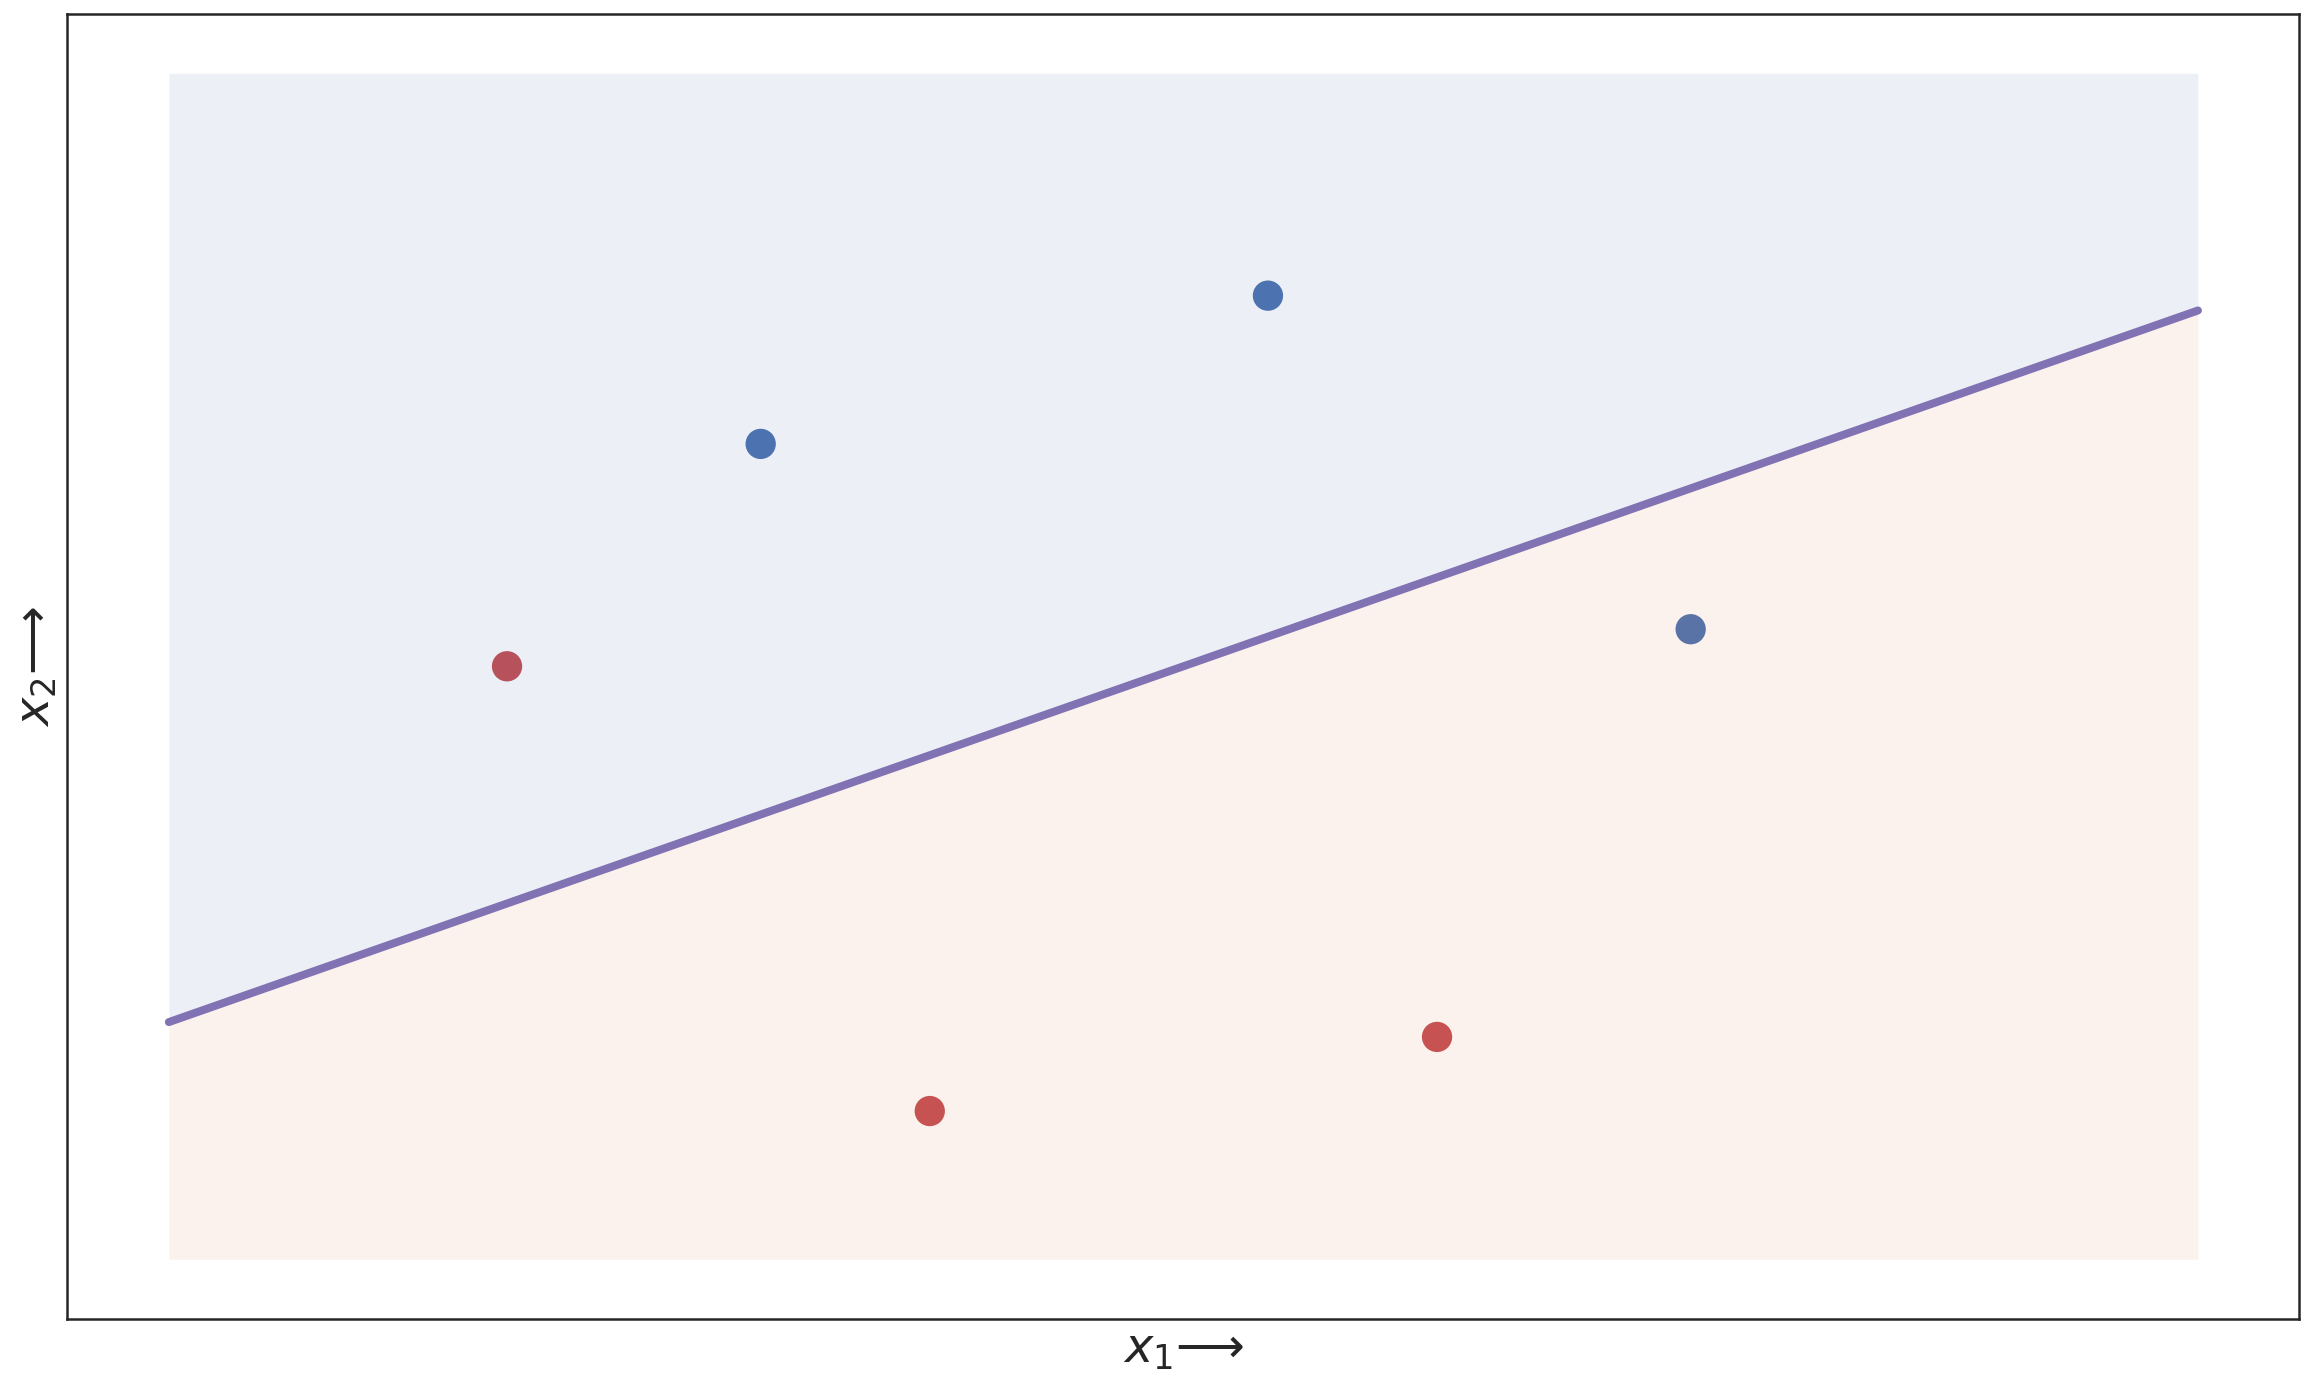

In [4]:
# Assign columns to variables
x1 = [0.1, 0.25, 0.35, 0.55, 0.65, 0.8]
x2 = [1.3, 1.6, 0.7, 1.8, 0.8, 1.35]
y = [1, 0, 1, 0, 1, 0]

# Draw plot
x_line = np.arange(-0.1, 1.11, 0.1)
plt.figure(figsize=[20, 12])

plt.scatter(x1, x2, c=y, s=200, cmap=matcol.ListedColormap([color_blue, color_red]))
plt.plot(x_line, x_line * 0.8 + 0.9, color=color_purple, linewidth=4)
plt.fill_between(x_line, x_line * 0.8 + 0.9, 2.1, alpha=0.1)
plt.fill_between(x_line, x_line * 0.8 + 0.9, 0.5, alpha=0.1)

# Set x and y labels
plt.xlabel('$x_1 ⟶$', fontsize=24)
plt.ylabel('$x_2 ⟶$', fontsize=24)

# Remove ticks
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False);

```{admonition} TODO
:class: tip
Add section about how the steps are made to adjust the boundary line and add a plot which shows the steps
```

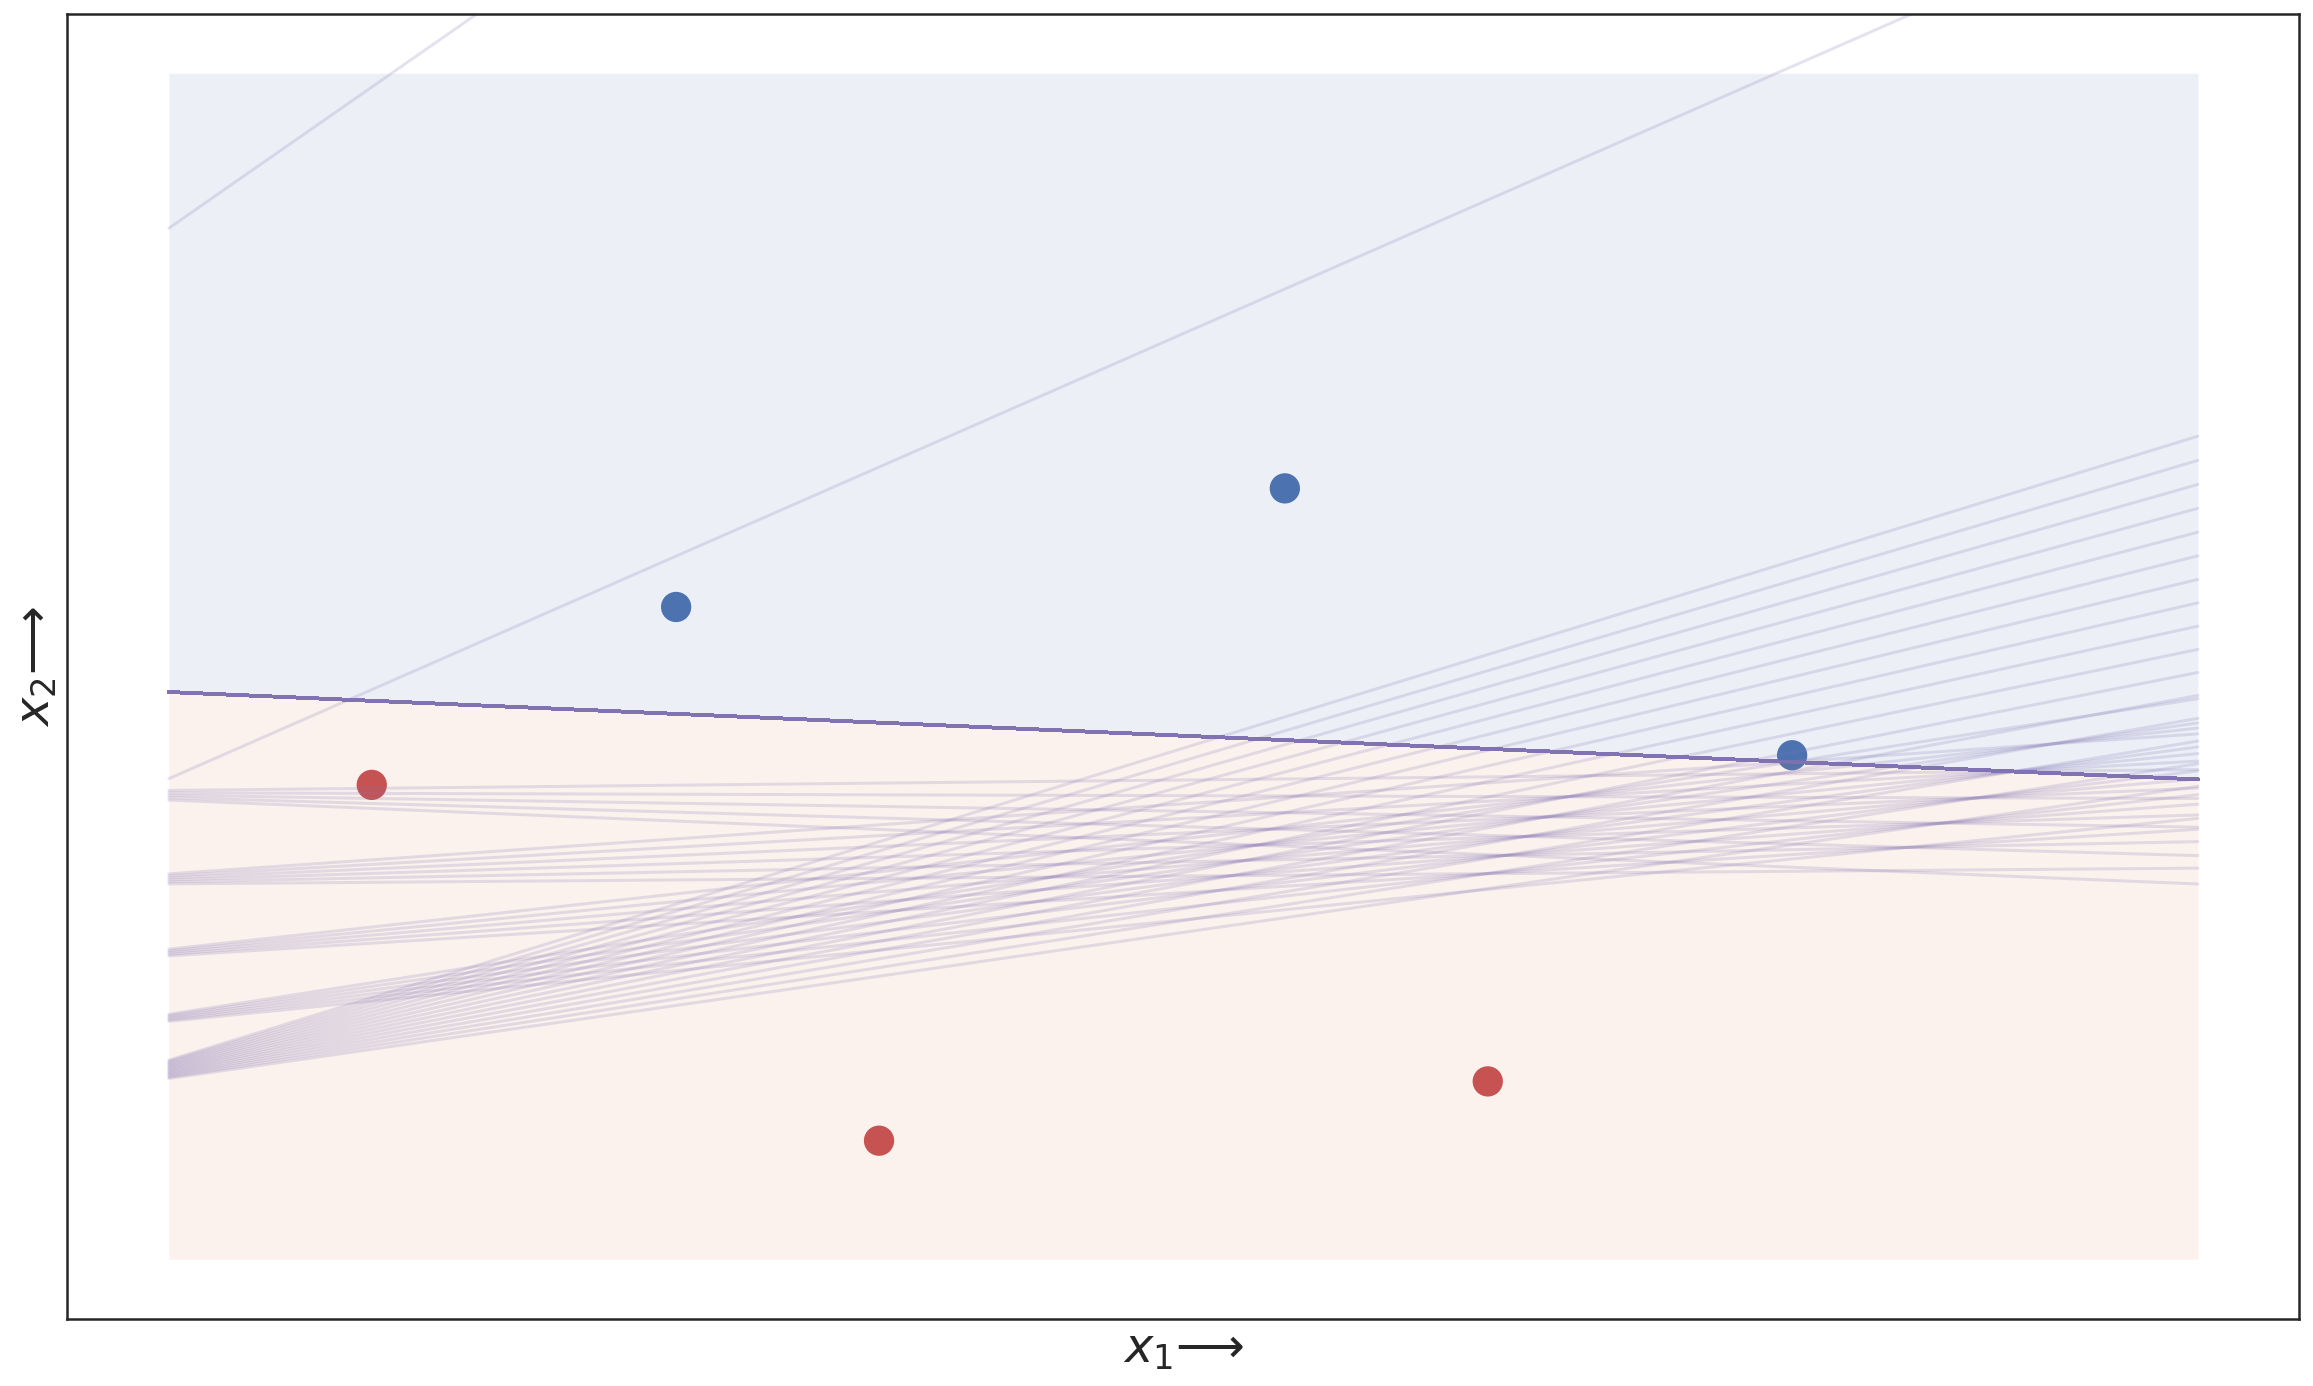

In [8]:
x1 = np.array([0.1, 0.25, 0.35, 0.55, 0.65, 0.8])
x2 = np.array([1.3, 1.6, 0.7, 1.8, 0.8, 1.35])

X = np.column_stack((x1, x2))
y = np.array([1, 0, 1, 0, 1, 0])

# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(28)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines

lines = trainPerceptronAlgorithm(X, y, learn_rate=0.02, num_epochs = 500)

plt.figure(figsize=[20, 12])
plt.scatter(X[:,0], X[:,1], c=y, s=200, cmap=matcol.ListedColormap([color_blue, color_red]))
plt.ylim(0.4,2.6)

x_plot = [0,1]

for line in lines:
    w = line[0]
    b = line[1]
    plt.plot(x_plot, w * x_plot + b, color=color_purple, alpha= 0.2)

plt.fill_between(x_plot, x_plot * w + b, 2.5, alpha=0.1)
plt.fill_between(x_plot, x_plot * w + b, 0.5, alpha=0.1)

# Set x and y labels
plt.xlabel('$x_1 ⟶$', fontsize=24)
plt.ylabel('$x_2 ⟶$', fontsize=24)

# Remove ticks
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False);